<a href="https://colab.research.google.com/github/asafdari-boop/ComputationalPhyiscsLibrary/blob/main/ODE2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Leapfrog method

Find the solution for $\frac{d^2x}{dt^2}=v^2-x-5$

We can change it to 

$\frac{dx}{dt} = v$

$\frac{dv}{dt} = v^2-x-5$

when $t=0$ we have $x=1$ and $v=0$

The equations are:

$r(t+h) = r(t) + h~f[r(t+h/2), ~t+h/2]$

$r(t+3h/2) = r(t+h/2) + h~f[r(t+h), ~t+h]$

The leapfrog method requires the "future"/subsequent positions in order to find the current velocities. 

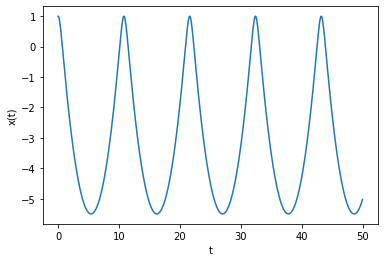

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
h = 0.001

# initial values
x_0 = 1
v_0 = 0

t_0 = 0
t_f = 50
   
# define the two differential equations
def f(r):
    x = r[0]
    v = r[1]
    return np.array([v, v**2-x-5], float)

# the leapfrog method
def leapfrog_vector():
    r = np.array([x_0, v_0], float)
    tpoints = np.arange(t_0, t_f, h)
    xpoints = []

    for t in tpoints:
        xpoints.append(r[0])
        r_mid = r + 0.5*h*f(r)   # Euler's method
        r += h*f(r_mid)

    plt.plot(tpoints, xpoints)
    plt.xlabel('t')
    plt.ylabel('x(t)')
    plt.show()
    
if __name__=="__main__":
    leapfrog_vector()

## Energy conservation for the RK4 and leapfrog methods

$\frac{d^2 \theta}{dt^2} = -\frac{g}{L} \sin \theta$

We can have two 1st order equations for $\theta$ and $\omega$: 

$\frac{d \theta}{dt} = \omega$ 

$\frac{d \omega}{dt} = -\frac{g}{L} \sin \theta$

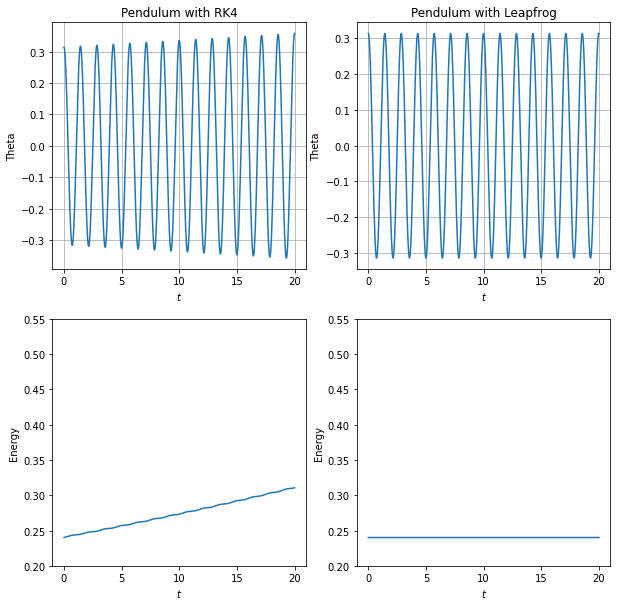

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# constants used
m, g, L = 1, 9.81, 0.5
theta0, omega0 = np.pi/10, 0.
t0, tMax = 0., 20.
h = (tMax-t0)/1e4

# define the two differential equations
def f(r, t):
    theta = r[0]
    omega = r[1]
    return np.array([omega, -g/L*np.sin(theta)], float)

# energy = mgl(1-cos theta)+1/2 mv^2
# here we need to calcualte theta and omega at all time points, integer or half-integer
def energy(theta, omega):
  energy = []
  for i in range(np.size(theta)):
    theta_i = theta[i]
    omega_i = omega[i]
    energy.append(m*g*L*(1-np.cos(theta_i)) + 1/2.*m*(L*omega_i)**2)
  return energy

# RK4 method
def Pendulum_RK4():
    r = np.array([theta0, omega0], float)
    tpoints = np.arange(t0, tMax, h)
    theta = []
    omega = []

    for t in tpoints:
      theta.append(r[0])
      omega.append(r[1])
      
      k1 = h*f(r, t)
      k2 = h*f(r+0.5*k1, t+0.5*h)
      k3 = h*f(r+0.5*k2, t+0.5*h)
      k4 = h*f(r+h, t+h)
      r += (k1+2*k2+2*k3+k4)/6

    return tpoints, theta, omega

# the leap frog method, use array to represent a vector of theta and omega
def Pendulum_Leapfrog():
    r = np.array([theta0, omega0], float)
    tpoints = np.arange(t0, tMax, h)   
    theta = []
    omega = []

    for t in tpoints:
        theta.append(r[0])
        omega.append(r[1])
        r_mid = r + 0.5*h*f(r, t)
        r += h*f(r_mid, t)

    return tpoints, theta, omega

if __name__=="__main__":
    t_RK4, theta_RK4, omega_RK4 = Pendulum_RK4()
    t_Leapfrog, theta_Leapfrog, omega_Leapfrog = Pendulum_Leapfrog()

    energy_RK4 = energy(theta_RK4, omega_RK4)
    energy_Leapfrog = energy(theta_Leapfrog, omega_Leapfrog)
    
    plt.figure(figsize = (10, 10))
    plt.subplot(221)
    plt.xlabel('$t$')
    plt.ylabel('Theta')
    plt.title("Pendulum with RK4")
    plt.plot(t_RK4, theta_RK4)
    plt.grid()
    plt.subplot(223)
    plt.xlabel('$t$')
    plt.ylabel('Energy')
    plt.ylim(0.2, 0.55)
    plt.plot(t_RK4, energy_RK4)

    plt.subplot(222)
    plt.xlabel('$t$')
    plt.ylabel('Theta')
    plt.title("Pendulum with Leapfrog")
    plt.grid()
    plt.plot(t_Leapfrog, theta_Leapfrog)
    plt.subplot(224)
    plt.xlabel('$t$')
    plt.ylabel('Energy')
    plt.ylim(0.2, 0.55)
    plt.plot(t_Leapfrog, energy_Leapfrog)
    plt.show()

## The driven harmonic oscillator

The driven harmonic oscillator is given by the following equation:
$$
\frac{d^2 x}{d t^2}+\gamma \frac{d x}{d t}+\omega_0^2 x=\frac{F}{m},
$$
where $\gamma$ is the damping constant, $\omega_0=\sqrt{k / m}$ is the natural angular frequency, $m$ is the mass, and $F$ is the driving force. This second-order equation can also be written with two first-order equations:
$$
\begin{aligned}
&\frac{d x}{d t}=v \\
&\frac{d v}{d t}=\frac{F}{m}-\gamma v-\omega_0^2 x
\end{aligned}
$$
which is the form we will use for the numerical integration.
The energy of the harmonic oscillator is:
$$
E=\frac{1}{2} m v^2+\frac{1}{2} k x^2,
$$
where $k=m \omega_0^2$.

## Leapfrog formulation
We have:
$$
\begin{gathered}
v_{n+1 / 2}= 
\frac{\left(1-\frac{\gamma \Delta t}{2}\right)}{\left(1+\frac{\gamma \Delta t}{2}\right)} v_{n-1 / 2}+\frac{\Delta t}{m\left(1+\frac{\gamma \Delta t}{2}\right)} F_n-\frac{\omega_0^2 \Delta t}{\left(1+\frac{\gamma \Delta t}{2}\right)} x_n
\end{gathered}
$$
$$
x_{n+1}=x_n+v_{n+1 / 2} \Delta t
$$

Assume $m=1$ and $k=1$.

In [ ]:
#!/usr/bin/python
# http://cvarin.github.io/CSci-Survival-Guide/leapfrog.html
from pylab import *

N = 10000
t = linspace(0,100,N)
dt = t[1] - t[0]

# functions
def integrate(F, x0, v0, gamma):
    x = zeros(N)
    v = zeros(N)
    E = zeros(N)    
       
    # initial conditions
    x[0] = x0
    v[0] = v0
    
    # integration
    fac1 = 1.0 - 0.5*gamma*dt
    fac2 = 1.0/(1.0 + 0.5*gamma*dt)
    
    # here v[i+1] is $v_{n+1/2}$ and v[i] is $v_{n-1/2}$ (used to store half-integer information)
    for i in range(N-1):
         v[i + 1] = fac1*fac2*v[i] - fac2*dt*x[i] + fac2*dt*F[i]
         x[i + 1] = x[i] + dt*v[i + 1]
         E[i] += 0.5*(x[i]**2 + ((v[i] + v[i+1])/2.0)**2)   # use the velocities at n+1/2 and n-1/2 to estimate the average velocity at n
    
    E[-1] = 0.5*(x[-1]**2 + v[-1]**2)
    
    return x,v,E

**Without a driven force but with/without damplings**

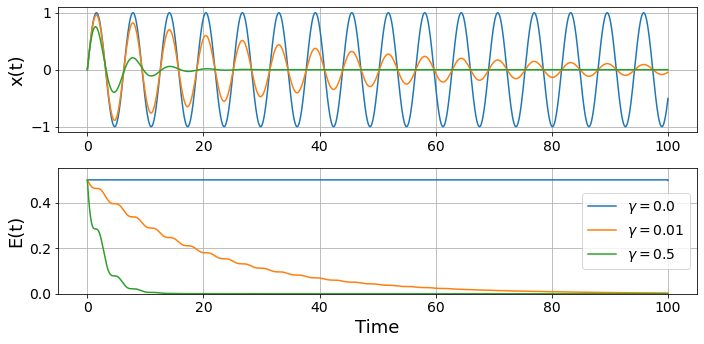

In [ ]:
# numerical integration
F = zeros(N)
x1,v1,E1 = integrate(F,0.0,1.0,0.0) # x0 = 0.0, v0 = 1.0, gamma = 0.0
x2,v2,E2 = integrate(F,0.0,1.0,0.05) # x0 = 0.0, v0 = 1.0, gamma = 0.01
x3,v3,E3 = integrate(F,0.0,1.0,0.4) # x0 = 0.0, v0 = 1.0, gamma = 0.5

rcParams["axes.grid"] = True
rcParams['font.size'] = 14
rcParams['axes.labelsize'] = 18
figure(figsize=(10, 5))
subplot(211)
plot(t,x1)
plot(t,x2)
plot(t,x3)
ylabel("x(t)")

subplot(212)
plot(t,E1,label=r"$\gamma = 0.0$")
plot(t,E2,label=r"$\gamma = 0.01$")
plot(t,E3,label=r"$\gamma = 0.5$")
ylim(0,0.55)
ylabel("E(t)")

xlabel("Time")
legend(loc="center right")

tight_layout()

**With a driven force but no dampling**

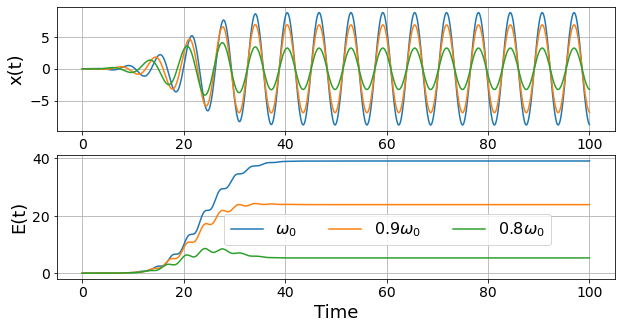

In [ ]:
# driven oscillator
def force(f0,t,w,T):
          return f0*cos(w*t)*exp(-t**2/T**2) 

F1 = zeros(N)
F2 = zeros(N)
F3 = zeros(N)
for i in range(N-1):
    F1[i] = force(1.0,t[i] - 20.0,1.0,10.0)
    F2[i] = force(1.0,t[i] - 20.0,0.9,10.0)
    F3[i] = force(1.0,t[i] - 20.0,0.8,10.0)

x1,v1,E1 = integrate(F1,0.0,0.0,0.0)
x2,v2,E2 = integrate(F2,0.0,0.0,0.0)
x3,v3,E3 = integrate(F3,0.0,0.0,0.0)

figure(figsize=(10, 5))
subplot(211)
plot(t,x1)
plot(t,x2)
plot(t,x3)
ylabel("x(t)")

subplot(212)
plot(t,E1,label=r"$\omega_0$")
plot(t,E2,label=r"$0.9\omega_0$")
plot(t,E3,label=r"$0.8\omega_0$")
ylabel("E(t)")

xlabel("Time")
rcParams['legend.fontsize'] = 16.0
legend(loc=(0.3,0.27),ncol=3)

**With a driven force and dampling**

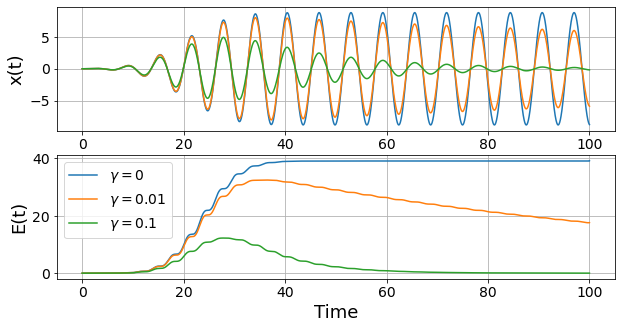

In [ ]:
# oscillator driven at resonance plus damping
x1,v1,E1 = integrate(F1,0.0,0.0,0.0)
x2,v2,E2 = integrate(F1,0.0,0.0,0.01)
x3,v3,E3 = integrate(F1,0.0,0.0,0.1)

figure(figsize=(10, 5))
subplot(211)
plot(t,x1)
plot(t,x2)
plot(t,x3)
ylabel("x(t)")

subplot(212)
plot(t,E1,label=r"$\gamma = 0$")
plot(t,E2,label=r"$\gamma = 0.01$")
plot(t,E3,label=r"$\gamma = 0.1$")
ylabel("E(t)")

xlabel("Time")
rcParams['legend.fontsize'] = 14.0
legend(loc="upper left")

show()

# The Verlet method

For equations like $\frac{d^2x}{dt^2} = f(x, t)$, where $f$ only depends on $x$ and $t$, not on $v$. 

If we define $\frac{dx}{dt} = v$ and $\frac{dv}{dt} = f(x, t)$, we have

$v(t+h/2) = v(t) + h/2~f[x(t), ~t]$

$x(t+h) = x(t) + h~v[t+h/2]$

define $k=h~f[x(t+h), ~t+h]$, we will have the formula for the Verlet method

```
$x(t+h) = x(t) + h v[t+h/2]$ 
$v(t+h) = v(t+h/2) + k/2$ 
$v(t+3/2h) = v(t+h/2) + k$ 
```
The Verlet method provides both positions and velocities at the same time steps and also requires only the initial positions and initial velocities to initiate. We also will have $v(t+3h/2) = v(t+h/2) + k$ where we can reuse the value of $k$ calculated earlier. 

The computing time will be reduced by a factor of 2 compared to the Leapfrog method.

Earth orbit

Let $r_0=x$, $r_1=\frac{dx}{dt}$, $r_2=y$ and $r_3=\frac{dy}{dt}$, so we have four equations for the earth:

$\frac{dr_0}{dt} = r_1$

$\frac{dr_1}{dt} = -GM \frac{r_0}{r^3}$

$\frac{dr_2}{dt} = r_3$

$\frac{dr_3}{dt} = -GM \frac{r_2}{r^3}$

with $r=\sqrt{r_0^2+r_2^2}$

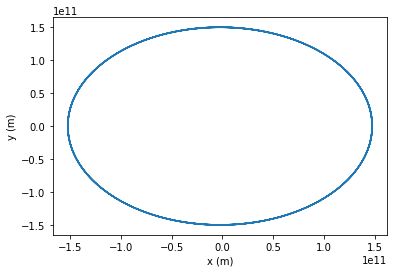

In [ ]:
# Earth orbit Verlet
from numpy import array, arange, sqrt
import matplotlib.pyplot as plt

# Constants
x_0 = 1.4710 * 10 ** 11
vx_0 = 0
y_0 = 0
vy_0 = 3.0287 * 10**4 * 8760 * 60 * 60  # m/yr
t_0 = 0
t_f = 4  # year
h = 1 / 8760  # 1 hour in years
G = 6.6738 * 10**-11 * (8760*60*60)**2
M = 1.9891 * 10**30  # mass of sun in kg
m = 5.9722 * 10**24  # mass of earth in kg

# the four differential equations
def f(r):
    x = r[0]
    vx = r[1]
    y = r[2]
    vy = r[3]
    dist = sqrt(x**2 + y**2)
    return array([vx, -G*M*x/dist**3, vy, -G*M*y/dist**3], float)

# Calculate orbit
tpoints = arange(t_0, t_f, h)
xpoints = []
ypoints = []
r = array([x_0, vx_0, y_0, vy_0], float)

f_mid = 0.5 * h * f(r)
vx_mid = r[1] + f_mid[1]
vy_mid = r[3] + f_mid[3]

# Verlet method
for t in tpoints:
    xpoints.append(r[0])
    ypoints.append(r[2])
   
    # the following two lines are for x(t+h) = x(t) + hv[t+h/2]
    r[0] += h * vx_mid
    r[2] += h * vy_mid
    k = h * f(r)

    # the following two lines are for v(t+h) = v(t+h/2) + hf[x(t+h), t+h]/2
    r[1] = vx_mid + 0.5 * k[1]
    r[3] = vy_mid + 0.5 * k[3]
  
    # the following two lines are for v(t+3h/2) = v(t+h/2) + hf[x(t+h), t+h]
    # update vx_mid and vy_mid values for the next time step
    vx_mid += k[1]
    vy_mid += k[3]

# Plot orbit
plt.plot(xpoints, ypoints)
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.show()

# The modified midpoint method and the Bulirsch-Stoer method

For a realistic pendulum

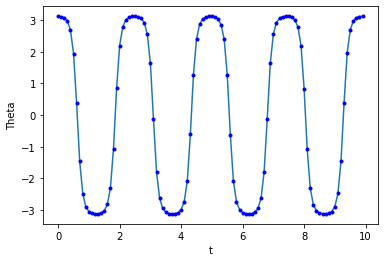

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# single non-linear pendulum
def f(r):
    theta = r[0]
    omega = r[1]
    ftheta = omega
    fomega = -(g/l)*np.sin(theta)
    return np.array([ftheta, fomega], float)

# constants
g = 9.81
l = 0.1
theta0 = 179*np.pi/180

a = 0.0
b = 10.0
N = 100          # Number of "big steps"
H = (b-a)/N      # Size of "big steps"
delta = 1e-8     # Required position accuracy per unit time

tpoints = np.arange(a, b, H)
thetapoints = []
r = np.array([theta0, 0.0], float)

# Do the "big steps" of size H
for t in tpoints:
    thetapoints.append(r[0])

    # Do one modified midpoint step to get things started
    n = 1
    r1 = r + 0.5*H*f(r)     
    r2 = r + H*f(r1)        

    # The array R1 stores the first row of the extrapolation table, which contains 
    # only the single modified midpoint estimate of the solution at the end of the interval
    R1 = np.empty([1,2],float)
    R1[0] = 0.5*(r1 + r2 + 0.5*H*f(r2))

    # increase n until the required accuracy is reached
    error = 2*H*delta   # initial error and error will be updated at the end of each iteration
    while error > H*delta:   
        n += 1
        h = H/n   # increase the size of n

        # Modified midpoint method
        r1 = r + 0.5*h*f(r)
        r2 = r + h*f(r1)
        for i in range(n-1):
            r1 += h*f(r2)
            r2 += h*f(r1)

        # Calculate extrapolation estimates. Arrays R1 and R2 hold the two most recent lines of the table
        R2 = R1
        R1 = np.empty([n,2],float)
        R1[0] = 0.5*(r1 + r2 + 0.5*h*f(r2))
        for m in range(1,n):
            epsilon = (R1[m-1]-R2[m-1])/((n/(n-1))**(2*m)-1)
            R1[m] = R1[m-1] + epsilon
        error = abs(epsilon[0])

    # Set r equal to the most accurate estimate we have,
    # before moving on to the next big step
    r = R1[n-1]

# Plot the results
plt.plot(tpoints, thetapoints)
plt.plot(tpoints, thetapoints,"b.")
plt.xlabel("t")
plt.ylabel("Theta")
plt.show()

The adaptive RK method takes about 4200 steps to calculate a solution to the same accuracy, while the BS method takes about 3800 modified midpoint steps in total. A RK step takes more computer time than a modified midpoint method, requiring four evaluations of the function f where the modified midpoint method requires only two. This means the total number of operations for the RK solution is around 16,800, compared with only about 7,600 for the BS solution.